In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [12]:
df.isnull().count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

Text(0, 0.5, 'Count')

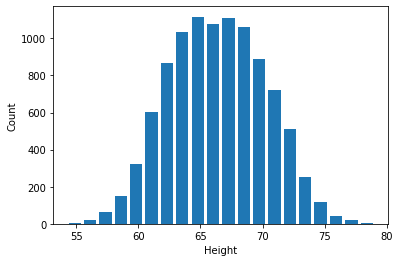

In [14]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("Count")

In [18]:
q1h=df.Height.quantile(0.25)
q3h=df.Height.quantile(0.75)
iqrh=q3h-q1h

In [21]:
uph=q3h+1.5*iqrh
llh=q1h-1.5*iqrh
uph,llh

(77.67722359525831, 55.00265861279534)

In [22]:
dfh=df[(df.Height>llh)&(df.Height<uph)]

In [23]:
dfh.shape

(9992, 3)

Text(0, 0.5, 'Count')

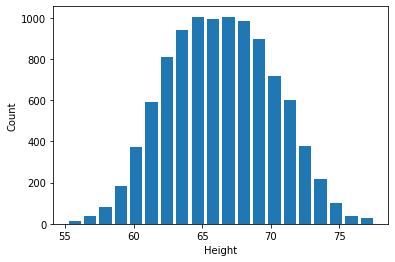

In [24]:
plt.hist(dfh.Height,bins=20,rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

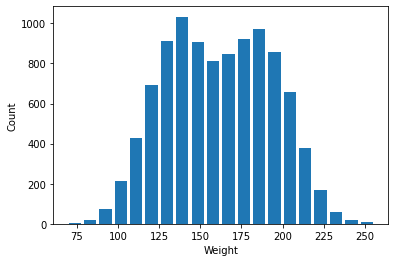

In [25]:
plt.hist(dfh.Weight,bins=20,rwidth=0.8)
plt.xlabel("Weight")
plt.ylabel("Count")

In [33]:
dfh.Weight.describe()

count    9992.000000
mean      161.422760
std        32.019872
min        68.982530
25%       135.821269
50%       161.197662
75%       187.124646
max       255.863326
Name: Weight, dtype: float64

In [35]:
q1w=dfh.Weight.quantile(0.25)
q3w=dfh.Weight.quantile(0.75)

In [36]:
iqrw=q3w-q1w


In [37]:
upw=q3w+1.5*iqrw
llw=q1w-1.5*iqrw
upw,llw

(264.0797132136474, 58.86620193294637)

In [38]:
dfw=dfh[(dfh.Weight>llw)&(dfh.Weight<upw)]

In [40]:
dfw.shape


(9992, 3)

Text(0, 0.5, 'Count')

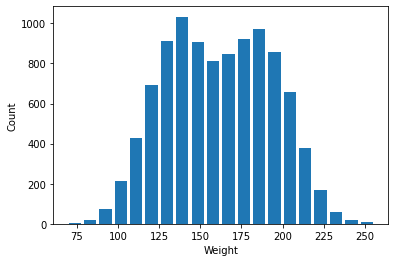

In [43]:
plt.hist(dfw.Weight,bins=20,rwidth=0.8)
plt.xlabel("Weight")
plt.ylabel("Count")

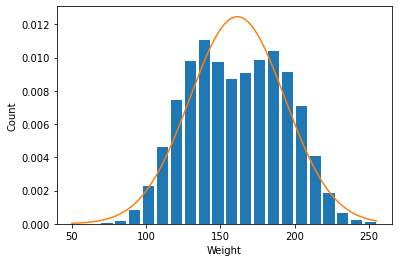

In [50]:
from scipy.stats import norm

plt.hist(dfw.Weight, bins=20, rwidth=0.8, density=True)
plt.xlabel('Weight')
plt.ylabel('Count')

rng = np.arange(50, dfw.Weight.max(), 1)
plt.plot(rng, norm.pdf(rng,dfw.Weight.mean(),dfw.Weight.std()))